In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('data/train.csv')

In [2]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data = np.array(data)

data

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [7, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0]])

In [4]:
m, n = data.shape

print(m, n)


42000 785


In [5]:
np.random.shuffle(data)

data

array([[1, 0, 0, ..., 0, 0, 0],
       [3, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [5, 0, 0, ..., 0, 0, 0]])

In [6]:
data_dev = data[0:1000].T 
# data_dev.shape
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev/255

data_train = data[1000:m].T 
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train/255

n_train, m_train = X_train.shape

m_train


41000

In [7]:
Y_train

array([7, 6, 2, ..., 0, 6, 5])

In [8]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(0, Z)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_der(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T 
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_der(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2


In [9]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions=predictions, Y=Y))
        
    return W1, b1, W2, b2 

In [10]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[4 8 4 ... 4 4 4] [7 6 2 ... 0 6 5]
0.08692682926829268
Iteration:  10
[3 7 4 ... 0 2 5] [7 6 2 ... 0 6 5]
0.19541463414634147
Iteration:  20
[7 7 4 ... 0 2 5] [7 6 2 ... 0 6 5]
0.2799268292682927
Iteration:  30
[7 7 4 ... 0 2 5] [7 6 2 ... 0 6 5]
0.3457073170731707
Iteration:  40
[7 7 4 ... 0 3 5] [7 6 2 ... 0 6 5]
0.3954146341463415
Iteration:  50
[7 7 4 ... 0 3 5] [7 6 2 ... 0 6 5]
0.4404878048780488
Iteration:  60
[7 7 4 ... 0 3 5] [7 6 2 ... 0 6 5]
0.4825121951219512
Iteration:  70
[7 4 4 ... 0 3 5] [7 6 2 ... 0 6 5]
0.5254878048780488
Iteration:  80
[7 4 4 ... 0 3 5] [7 6 2 ... 0 6 5]
0.565390243902439
Iteration:  90
[7 4 2 ... 0 8 5] [7 6 2 ... 0 6 5]
0.6012926829268292
Iteration:  100
[7 4 2 ... 0 8 5] [7 6 2 ... 0 6 5]
0.6340243902439024
Iteration:  110
[7 4 2 ... 0 8 5] [7 6 2 ... 0 6 5]
0.660609756097561
Iteration:  120
[7 4 2 ... 0 8 5] [7 6 2 ... 0 6 5]
0.6818048780487805
Iteration:  130
[7 4 2 ... 0 8 5] [7 6 2 ... 0 6 5]
0.6998780487804878
Iteration:  140
[

In [11]:
def make_predictions(X, W1, b1,W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [7]
Label:  7


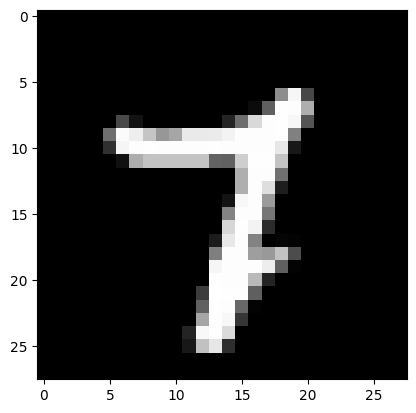

Prediction:  [6]
Label:  6


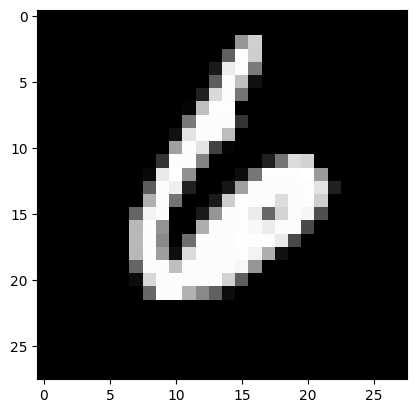

Prediction:  [2]
Label:  2


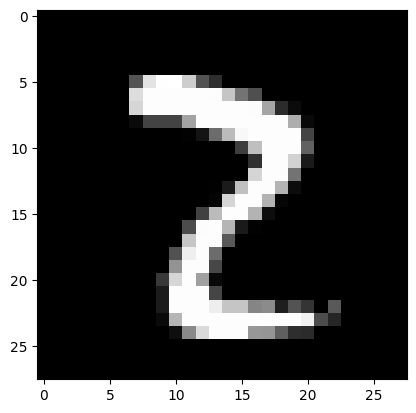

Prediction:  [9]
Label:  9


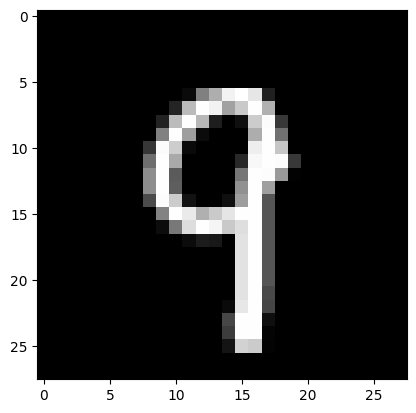

In [12]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [16]:
print(f"W1: {W1},\n\n b1: {b1},\n\n W2: {W2},\n\n b2: {b2}")

W1: [[ 0.24438056 -0.45829105 -0.41887543 ... -0.30708255 -0.21485887
  -0.04650511]
 [ 0.01502864 -0.33692616  0.35049571 ... -0.23995275 -0.46351021
  -0.17991985]
 [-0.42528415  0.39398949  0.00546912 ... -0.46453981  0.436994
  -0.41725853]
 ...
 [-0.06508653 -0.08825828 -0.28475743 ... -0.16883999  0.036763
  -0.30210824]
 [ 0.16638078  0.10738245 -0.06673967 ... -0.40602156 -0.06241324
   0.18121697]
 [ 0.2187438   0.46845504  0.22408646 ...  0.0295018  -0.03499114
   0.37491509]],

 b1: [[0.3823175 ]
 [0.28637041]
 [0.0422184 ]
 [0.07851285]
 [0.35304018]
 [0.32639171]
 [0.50403869]
 [0.56437871]
 [0.61059709]
 [0.9131267 ]],

 W2: [[ 0.57823152  0.03456481  0.32884775 -0.59832219  0.43809002  0.05135952
  -0.64438113  0.73983087 -0.37329284  0.19035437]
 [-0.17638615  0.08483802  0.09458802 -0.35824498  0.37395589 -0.21144105
   0.95894688 -0.35228894 -0.61915201 -0.30546299]
 [-0.26233324  0.7165065   0.33003203  0.16383178  0.1021833  -0.01129589
  -0.19749251  0.5964896  -0.

In [17]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[1 3 1 4 6 1 4 0 2 4 5 2 3 6 8 0 4 1 9 3 4 5 6 6 9 3 5 6 3 1 5 9 2 5 5 9 3
 9 5 4 2 7 9 7 7 3 8 9 1 7 2 3 7 7 3 8 6 1 7 7 9 3 6 4 4 3 0 5 8 2 3 1 8 6
 4 7 0 6 4 3 4 1 6 7 9 1 2 0 4 1 6 1 5 3 7 4 7 9 4 4 2 7 2 1 2 5 2 6 2 0 3
 1 1 6 8 9 8 1 9 7 7 6 7 9 2 2 3 9 2 9 6 8 8 1 4 6 9 3 8 9 9 5 9 4 3 9 2 6
 9 2 9 2 4 1 1 9 9 4 2 6 7 9 9 5 8 3 1 1 7 1 1 5 1 9 6 4 9 1 9 7 7 7 1 5 2
 7 3 9 8 3 6 4 4 3 4 1 6 1 8 7 6 0 7 6 9 0 6 9 5 3 9 1 8 4 7 8 3 2 4 0 7 1
 8 8 6 0 7 4 7 7 3 3 3 3 6 7 0 3 5 8 2 1 8 6 4 9 9 3 1 9 4 4 4 6 4 6 8 3 5
 4 9 5 4 4 5 5 2 4 9 4 8 0 5 4 9 3 3 1 8 5 3 1 8 4 1 9 6 4 4 9 8 3 0 2 8 0
 0 3 8 4 0 1 9 8 1 3 4 4 3 8 2 9 3 6 4 0 5 8 1 2 6 4 2 6 1 2 8 6 3 1 8 5 1
 8 1 6 2 6 0 5 6 6 2 6 6 4 3 6 1 3 9 0 5 8 5 3 4 1 1 1 9 8 9 2 1 4 5 8 6 1
 9 3 6 7 2 0 5 9 2 7 2 3 2 0 8 9 5 5 9 1 0 7 4 4 1 3 9 2 9 5 5 8 9 7 9 8 8
 6 9 0 7 5 2 5 1 0 8 4 7 0 7 1 9 1 4 4 4 7 4 9 4 5 7 9 2 8 4 3 3 0 5 3 3 9
 1 6 5 5 7 9 5 4 3 1 2 7 3 0 2 9 4 7 2 5 5 2 0 0 9 7 2 6 3 8 6 0 0 9 1 4 3
 1 4 6 0 0 3 3 0 5 1 7 4 

0.843

In [18]:
dev_df = pd.DataFrame({
    'ImageId' : range(1, len(dev_predictions) + 1),
    'Label': dev_predictions
})

In [19]:
dev_df.to_csv('data/dev_predictions.csv', index=False)
print("CSV file generated successfully.")

CSV file generated successfully.


In [24]:
test_data = pd.read_csv('data/test.csv')
test_data = test_data.T 


In [25]:
test_data = test_data / 255

In [26]:
test_predictions = make_predictions(test_data, W1, b1, W2, b2)


In [27]:
test_predictions

array([2, 0, 9, ..., 3, 9, 2])

In [28]:
test_df = pd.DataFrame({
    'ImageId': range(1, len(test_predictions) + 1),
    'Label': test_predictions
})

In [29]:
test_df.to_csv('data/test_predictions.csv', index=False)
print("Test CSV file generated successfully.")

Test CSV file generated successfully.
